In [261]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [262]:
start=time.time()
mydata=pd.read_csv(r"C:\Users\Raj\Downloads\framingham.csv")
end=time.time()
print("time taken to load data is {} second".format(end-start))

time taken to load data is 0.0059986114501953125 second


In [263]:
mydata

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


#Cleaning the data

In [264]:
mydata.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [265]:
mydata["education"].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [266]:
mydata["education"] = mydata["education"].fillna(2)

In [269]:
mydata["cigsPerDay"].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [270]:
mydata["cigsPerDay"]= mydata["cigsPerDay"].fillna(mydata["cigsPerDay"].mean())

In [272]:
mydata["BPMeds"].describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [273]:
mydata["BPMeds"]= mydata["BPMeds"].fillna(mydata["BPMeds"].mean())

In [275]:
mydata["totChol"].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [276]:
mydata["totChol"] = mydata["totChol"].fillna(mydata["totChol"].mean())

In [278]:
mydata["BMI"].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [279]:
mydata["BMI"] = mydata["BMI"].fillna(mydata["BMI"].mean())

In [281]:
mydata["heartRate"].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [282]:
mydata["heartRate"] = mydata["heartRate"].fillna(mydata["heartRate"].mean())

In [283]:
mydata["glucose"].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [284]:
mydata["glucose"] = mydata["glucose"].fillna(mydata["glucose"].mean())

In [285]:
mydata.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

#Which age group has more smokers.


Text(0, 0.5, 'currentSmokers')

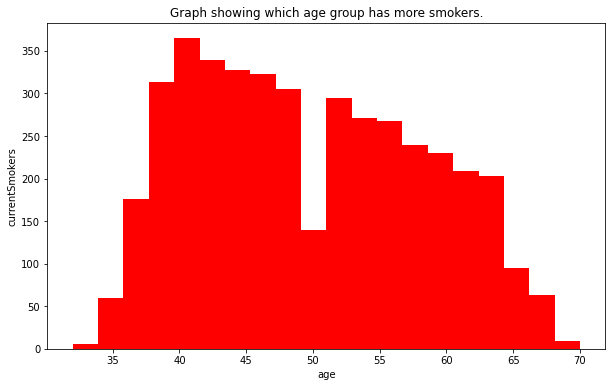

In [286]:
plt.hist(x=mydata["age"],bins=20,color="red")
plt.title("Graph showing which age group has more smokers.")
plt.rcParams["figure.figsize"]= (10,6)
plt.xlabel("age")
plt.ylabel("currentSmokers",)


#Mid-age groups have more smokers

#Seperating feature from target

In [287]:
X_feature=mydata.iloc[:,0:15]
Y_target=mydata["TenYearCHD"]

In [288]:
X_feature

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [289]:
X_feature.shape

(4238, 15)

In [290]:
X_feature.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object

#splitting data

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train,X_test,Y_train,Y_test=train_test_split(X_feature,Y_target,test_size=.30,random_state=100)

#Modeling

In [293]:
from sklearn.linear_model import LogisticRegression

In [306]:
start=time.time()
lr_trainer=LogisticRegression(max_iter=2000)
lr_learner=lr_trainer.fit(X_train,Y_train)
end=time.time()
lr_training_time=end-start
print("Time taken is {}".format(lr_training_time))

Time taken is 0.5750319957733154


In [307]:
start=time.time()
YPlr=lr_learner.predict(X_test)
end=time.time()
lr_testing_time=end-start
print("Time taken is {}".format(lr_testing_time))

Time taken is 0.002000093460083008


In [308]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(YPlr,Y_test)*100
print("Acc of Lr is {}".format(acc_lr))

Acc of Lr is 84.43396226415094
